# Kam's Notebook (Predictive Modeling for Chicago Crime Statistics)

## *How do we predict future crime rates or the likelihood of crime in different locations.*

### __Thesis__: Develop models to assess criminal activity occurring in different areas based on historical data, which could be useful for predictive policing.

### Target: Location     
### Features: Crime and Time

## *What models can we use and what can we use them for?*

### __Logistic Regression__: This model is ideal for binary outcomes, such as predicting whether or not an arrest was made for each reported crime. You could also modify it to predict the likelihood of a crime being domestic.

### Decision Trees and Random Forests: These models are beneficial for handling categorical data and are robust against outliers, making them suitable for crime data which often has diverse attributes. Decision trees can provide insights into the decision-making process (i.e., which features are most important for predicting a crime's category), while Random Forests can improve prediction accuracy by averaging multiple trees.

### Support Vector Machines (SVM): SVM can be used for both binary and multi-class classification tasks. It would be useful for distinguishing between different types of crimes or predicting whether specific incidents fall into high-risk categories.

### Naive Bayes Classifier: Given its basis in probability, this model is particularly effective when the assumption of independence holds reasonably well. It's commonly used for text classification and could be adapted to classify crime types based on descriptions.

### K-Nearest Neighbors (KNN): This model classifies new data points based on the categories of its nearest neighbors in the feature space. It's straightforward and can be very effective, especially if the geographical and temporal features are influential in predicting crime types or outcomes.

### Ensemble Methods: Techniques like Boosting and Bagging can improve the predictive performance by combining several weak models to create a robust prediction. These methods are useful in scenarios where the decision boundary is very complex and a single model does not perform adequately.

### Gradient Boosting Machines (GBM): GBMs, including implementations like XGBoost, LightGBM, and CatBoost, are currently among the most powerful classification techniques, especially in structured data like crime records. They can handle different data types and are highly customizable.


## Import Libraries

In [ ]:
!pip install geopandas
!pip install contextily
!pip install category_encoders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import geopandas as gpd
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Data

In [2]:
# Load the data
chi_crime_data = pd.read_csv("C:\\Users\kamar\Downloads\Chicago_Crimes_2012_to_2017.csv")
chi_crime_data.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,1108,10508702,HZ250447,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,8.0,44.0,04B,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,1130,10508703,HZ250489,05/03/2016 10:30:00 PM,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,...,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,1801,10508704,HZ250514,05/03/2016 09:30:00 PM,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,3.0,38.0,08B,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,...,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,1891,10508982,HZ250667,05/03/2016 10:30:00 PM,069XX S ASHLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,17.0,67.0,08B,1166876.0,1858796.0,2016,05/10/2016 03:56:50 PM,41.768097,-87.663879,"(41.768096835, -87.663878589)"


In [3]:
chi_crime_data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


## Exploratory Data Analysis

In [4]:
# Check Dataset Information
chi_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [5]:
# Check for missing values
chi_crime_data.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [6]:
# Check for Duplicates
chi_crime_data.duplicated().sum()

0

In [7]:
# Remove rows where 'District' is NaN
original_size = chi_crime_data.shape[0]  
chi_crime_data = chi_crime_data.dropna(subset=['District'])

# Verify that the row has been removed and there are no more NaN values in 'District'
print(f"Original size: {original_size}, New size: {chi_crime_data.shape[0]}")
print(f"Remaining NaNs in 'District': {chi_crime_data['District'].isnull().sum()}")

Original size: 1456714, New size: 1456713
Remaining NaNs in 'District': 0


In [44]:
# Fill missing values for 'Location Description', 'Ward', 'Community Area' with the mode
for column in ['Location Description', 'Ward', 'Community Area']:
    mode_value = chi_crime_data[column].mode()[0]
    chi_crime_data[column].fillna(mode_value, inplace=True)

In [45]:
# Drop rows where 'Case Number' is missing
chi_crime_data.dropna(subset=['Case Number'], inplace=True)

In [46]:
# Drop rows missing geographical data
chi_crime_data.dropna(subset=['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'], inplace=True)

# Rechecking data after updates
chi_crime_data.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour                    0
Day of Week             0
Month                   0
dtype: int64

In [47]:
# Convert 'Date' to datetime, specifying format
chi_crime_data['Date'] = pd.to_datetime(chi_crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the hour, day of the week, and month
chi_crime_data['Hour'] = chi_crime_data['Date'].dt.hour
chi_crime_data['Day of Week'] = chi_crime_data['Date'].dt.day_name()
chi_crime_data['Month'] = chi_crime_data['Date'].dt.month

In [48]:
# Rechecking Information
chi_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419590 entries, 0 to 1456713
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Unnamed: 0            1419590 non-null  int64         
 1   ID                    1419590 non-null  int64         
 2   Case Number           1419590 non-null  object        
 3   Date                  1419590 non-null  datetime64[ns]
 4   Block                 1419590 non-null  object        
 5   IUCR                  1419590 non-null  object        
 6   Primary Type          1419590 non-null  object        
 7   Description           1419590 non-null  object        
 8   Location Description  1419590 non-null  object        
 9   Arrest                1419590 non-null  int32         
 10  Domestic              1419590 non-null  int32         
 11  Beat                  1419590 non-null  int64         
 12  District              1419590 non-null  float64

In [49]:
# Investigating Months
unique_primary_types = chi_crime_data['Month'].unique()
unique_primary_types

array([ 5,  1,  2,  3,  4,  6,  7,  8,  9, 11, 12, 10])

In [50]:
# Investigating Day of Week
unique_primary_types = chi_crime_data['Day of Week'].unique()
unique_primary_types

array(['Tuesday', 'Wednesday', 'Sunday', 'Thursday', 'Monday', 'Friday',
       'Saturday'], dtype=object)

In [51]:
# Investigating Hour
unique_primary_types = chi_crime_data['Hour'].unique()
unique_primary_types

array([23, 21, 22, 16, 17,  9, 20, 13, 18,  7,  0, 14, 19,  6,  1, 11, 15,
       10, 12,  8,  5,  2,  3,  4])

In [52]:
# Display summary statistics for numerical columns
chi_crime_data.describe()

,Unnamed: 0,ID,Date,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour,Month
count,1.419590e+06,1.419590e+06,1419590,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06,1.419590e+06
mean,3.273577e+06,9.574939e+06,2014-05-10 06:04:40.030005504,2.613762e-01,1.515473e-01,1.150501e+03,1.125697e+01,2.286070e+01,3.746314e+01,1.164399e+06,1.885522e+06,2.013851e+03,4.184147e+01,-8.767223e+01,1.323372e+01,6.558632e+00
min,3.000000e+00,2.022400e+04,2012-01-01 00:00:00,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01,0.000000e+00,1.000000e+00
25%,2.696717e+06,8.987087e+06,2013-01-25 22:00:00,0.000000e+00,0.000000e+00,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01,9.000000e+00,4.000000e+00
50%,3.052444e+06,9.576352e+06,2014-04-15 20:34:30,0.000000e+00,0.000000e+00,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166022e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01,1.400000e+01,7.000000e+00
75%,3.409866e+06,1.019198e+07,2015-08-09 15:00:00,1.000000e+00,0.000000e+00,1.711000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01,1.900000e+01,9.000000e+00
max,6.253474e+06,1.082334e+07,2017-01-18 10:12:00,1.000000e+00,1.000000e+00,2.535000e+03,2.500000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01,2.300000e+01,1.200000e+01
std,1.183636e+06,8.011934e+05,NaN,4.393846e-01,3.585816e-01,6.916823e+02,6.904453e+00,1.379725e+01,2.143224e+01,1.850719e+04,3.424733e+04,1.423584e+00,9.430010e-02,6.661297e-02,6.593828e+00,3.331146e+00


In [53]:
# Count of unique values in each column to understand diversity of categories
chi_crime_data.nunique()

Unnamed: 0              1419590
ID                      1419590
Case Number             1419483
Date                     571363
Block                     32628
IUCR                        363
Primary Type                 33
Description                 340
Location Description        140
Arrest                        2
Domestic                      2
Beat                        302
District                     22
Ward                         50
Community Area               77
FBI Code                     26
X Coordinate              67707
Y Coordinate             111550
Year                          6
Updated On                  950
Latitude                 368066
Longitude                367932
Location                 368276
Hour                         24
Day of Week                   7
Month                        12
dtype: int64

In [54]:
# Display unique crime types
unique_primary_types = chi_crime_data['Primary Type'].unique()
unique_primary_types

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [55]:
# Display location columns
unique_primary_types = chi_crime_data['Location'].unique()
unique_primary_types

array(['(41.864073157, -87.706818608)', '(41.782921527, -87.60436317)',
       '(41.894908283, -87.758371958)', ...,
       '(41.766796861, -87.623332025)', '(41.720164061, -87.657669427)',
       '(41.75830866, -87.620658418)'], dtype=object)

In [56]:
# Remove parentheses and split the string on ','
chi_crime_data[['Latitude', 'Longitude']] = chi_crime_data['Location'].str.replace('[()]', '', regex=True).str.split(',', expand=True)

# Convert the new columns to float
chi_crime_data['Latitude'] = chi_crime_data['Latitude'].astype(float)
chi_crime_data['Longitude'] = chi_crime_data['Longitude'].astype(float)
print(chi_crime_data[['Latitude', 'Longitude']].head())

    Latitude  Longitude
0  41.864073 -87.706819
1  41.782922 -87.604363
2  41.894908 -87.758372
3  41.885687 -87.749516
4  41.886297 -87.761751


In [57]:
# Display unique date types
unique_primary_types = chi_crime_data['Date'].unique()
unique_primary_types

<DatetimeArray>
['2016-05-03 23:40:00', '2016-05-03 21:40:00', '2016-05-03 23:31:00',
 '2016-05-03 22:10:00', '2016-05-03 22:00:00', '2016-05-03 22:35:00',
 '2016-05-03 22:30:00', '2016-05-03 21:30:00', '2016-05-03 16:00:00',
 '2016-05-03 21:44:00',
 ...
 '2016-05-03 19:13:00', '2016-05-03 20:56:00', '2016-05-03 23:58:00',
 '2016-05-03 23:38:00', '2016-05-03 20:44:00', '2016-05-03 23:35:00',
 '2016-05-03 22:25:00', '2016-05-03 23:28:00', '2016-05-03 23:33:00',
 '2016-05-03 21:07:00']
Length: 571363, dtype: datetime64[ns]

In [58]:
# Display unique description types
unique_primary_types = chi_crime_data['Description'].unique()
unique_primary_types

array(['DOMESTIC BATTERY SIMPLE', 'RECKLESS CONDUCT', 'SIMPLE',
       '$500 AND UNDER', 'AGGRAVATED: HANDGUN',
       'UNLAWFUL POSS OF HANDGUN', 'FROM BUILDING', 'OVER $500',
       'ARMED: OTHER DANGEROUS WEAPON', 'AUTOMOBILE',
       'OTHER VEHICLE OFFENSE', 'FRAUD OR CONFIDENCE GAME',
       'FINANCIAL IDENTITY THEFT OVER $ 300', 'CRIMINAL DEFACEMENT',
       'TO PROPERTY', 'HARASSMENT BY TELEPHONE',
       'RECKLESS FIREARM DISCHARGE', 'TELEPHONE THREAT',
       'ILLEGAL USE CASH CARD', 'TO VEHICLE', 'RETAIL THEFT',
       'FINANCIAL IDENTITY THEFT $300 AND UNDER', 'CREDIT CARD FRAUD',
       'BOMB THREAT', 'STRONGARM - NO WEAPON', 'TO LAND',
       'ANIMAL ABUSE/NEGLECT', 'UNLAWFUL ENTRY', 'FALSE FIRE ALARM',
       'FORCIBLE ENTRY', 'ATTEMPT FORCIBLE ENTRY', 'BOGUS CHECK',
       'ARMED: HANDGUN', 'PURSE-SNATCHING',
       'HARASSMENT BY ELECTRONIC MEANS', 'AGGRAVATED: OTHER',
       'POSS: CANNABIS 30GMS OR LESS', 'CRIMINAL SEXUAL ABUSE',
       'ARMED:KNIFE/CUTTING INSTRUMENT

In [59]:
# Convert boolean columns to integer
chi_crime_data['Arrest'] = chi_crime_data['Arrest'].astype(int)
chi_crime_data['Domestic'] = chi_crime_data['Domestic'].astype(int)

In [60]:
# Sort the DataFrame by the 'Date' column from oldest to newest
sorted_crime_data = chi_crime_data.sort_values(by='Date', ascending=True)

# Display the first and last dates to see the range
print("Earliest Date in Dataset:", sorted_crime_data['Date'].iloc[0])
print("Latest Date in Dataset:", sorted_crime_data['Date'].iloc[-1])

Earliest Date in Dataset: 2012-01-01 00:00:00
Latest Date in Dataset: 2017-01-18 10:12:00


In [61]:
# Select numerical columns for the correlation matrix
numerical_chi_crime_data = chi_crime_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_chi_crime_data.corr()

# Print or visualize the correlation matrix
print(correlation_matrix)

                Unnamed: 0        ID      Beat  District      Ward  \
Unnamed: 0        1.000000  0.513077 -0.003218 -0.001361  0.004489   
ID                0.513077  1.000000 -0.003850 -0.000261  0.007609   
Beat             -0.003218 -0.003850  1.000000  0.997394  0.683295   
District         -0.001361 -0.000261  0.997394  1.000000  0.687034   
Ward              0.004489  0.007609  0.683295  0.687034  1.000000   
Community Area   -0.010098 -0.014997 -0.494511 -0.494760 -0.542977   
X Coordinate      0.002452 -0.000454 -0.492197 -0.495036 -0.405961   
Y Coordinate      0.008656  0.013873  0.585498  0.586429  0.605653   
Year              0.582154  0.836029 -0.008848 -0.005343  0.002645   
Latitude          0.008630  0.013844  0.585567  0.586504  0.605288   
Longitude         0.002565 -0.000350 -0.493397 -0.496261 -0.405145   

                Community Area  X Coordinate  Y Coordinate      Year  \
Unnamed: 0           -0.010098      0.002452      0.008656  0.582154   
ID             

In [62]:
# Investigating Columns for District
unique_primary_types = chi_crime_data['District'].unique()
unique_primary_types

array([10.,  3., 15.,  6.,  1.,  2., 24.,  7., 18., 12., 14.,  8., 22.,
       19., 16.,  9., 25.,  5., 17.,  4., 11., 20.])

In [63]:
# Investigating Columns for Community Areas
unique_primary_types = chi_crime_data['Community Area'].unique()
unique_primary_types

array([29., 42., 25., 44., 35., 38.,  1., 67., 43.,  8., 28., 24., 66.,
       40., 73., 39., 41.,  7., 10., 34., 58., 71., 32., 23.,  6., 77.,
       49., 61., 21., 54., 56., 46., 19., 60., 68., 59., 22., 26., 45.,
       30., 11., 69., 31.,  3., 15.,  2., 63., 36., 75., 65., 17., 13.,
       33., 14., 27., 16., 37., 53., 50.,  9., 76., 51., 62.,  4., 57.,
       52., 70., 48., 18., 20.,  5., 64., 12., 55., 72., 47., 74.])

In [64]:
# Investigating Columns for Beat
unique_primary_types = chi_crime_data['Beat'].unique()
unique_primary_types

array([1022,  313, 1524, 1532, 1523,  631,  133,  215, 2432,  735,  334,
       1834, 1232, 1434,  831, 1424,  225, 2232,  222,  235, 1932, 1611,
       1831, 2223,  915,  821,  613,  122, 1513, 2534, 1923, 2433,  511,
        925, 1733,  331,  725,  533,  824,  811, 2213, 1732,  112,  424,
       2511,  914,  324, 1832,  723, 1812,  912,  622, 2531, 1422, 1432,
        922, 1122,  123,  111,  121,  512,  411, 1032, 1623,  611,  634,
        624, 1023, 2032,  712, 2535, 1634, 2412,  333, 2012, 1824,  822,
        214, 1121, 2212, 1112,  321,  412,  833,  825, 1633, 1933,  633,
        931, 1712, 2533, 1833, 1024, 1235, 1924,  623, 1934,  332,  131,
        223, 1724, 1814,  132, 1411, 1214, 1222, 1631,  232, 1632, 1231,
        715,  832, 1225,  312,  823,  422,  935,  835, 1533,  934, 1134,
        523,  421,  724, 1213,  234, 2013, 2422, 2411, 2532, 1132, 1021,
       1034,  323,  211,  531, 1131, 1133,  726, 1613,  632, 1033,  614,
       1821,  612, 1731,  711,  532, 1925, 2424, 11

In [65]:
# Investigating Columns for Ward
unique_primary_types = chi_crime_data['Ward'].unique()
unique_primary_types

array([24., 20., 37., 28.,  8.,  3., 40., 17.,  7., 42.,  2.,  4.,  1.,
       18., 34.,  5., 32., 41., 21., 11., 14., 29., 44., 48.,  9., 33.,
       16., 23., 30., 43., 26., 27., 12., 45.,  6., 25., 47., 38., 50.,
       22., 19., 13., 36., 35., 15., 49., 39., 46., 10., 31.])

In [66]:
# Group by 'District' and 'Primary Type' and get the size of each grouping
crime_counts = chi_crime_data.groupby(['District', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_counts_df = crime_counts.reset_index(name='Count')

# Sort the DataFrame by 'District' and 'Count' in descending order to get the most crimes on top
sorted_crime_counts = crime_counts_df.sort_values(['District', 'Count'], ascending=[True, False])

# Drop duplicates, keeping the first entry for each 'District' which is the crime with the highest count
most_crime_by_district = sorted_crime_counts.drop_duplicates(subset='District')

# Display the results
print(most_crime_by_district)

     District Primary Type  Count
30        1.0        THEFT  28877
61        2.0        THEFT  13418
65        3.0      BATTERY  15702
96        4.0      BATTERY  17410
127       5.0      BATTERY  13872
158       6.0      BATTERY  17812
189       7.0      BATTERY  19249
244       8.0        THEFT  19663
277       9.0        THEFT  13581
281      10.0      BATTERY  14506
325      11.0    NARCOTICS  27467
369      12.0        THEFT  21038
398      14.0        THEFT  16657
417      15.0    NARCOTICS  14117
459      16.0        THEFT  11760
488      17.0        THEFT  10607
519      18.0        THEFT  29561
550      19.0        THEFT  23267
580      20.0        THEFT   6410
608      22.0        THEFT   9862
637      24.0        THEFT   9460
667      25.0        THEFT  15918


In [29]:
# Group by 'Community Area' and 'Primary Type' and get the size of each grouping
crime_counts_comm = chi_crime_data.groupby(['Community Area', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_counts_df_one = crime_counts_comm.reset_index(name='Count')

# Sort the DataFrame by 'Community Area' and 'Count' in descending order to get the most crimes on top
sort_crime_counts = crime_counts_df_one.sort_values(['Community Area', 'Count'], ascending=[True, False])

# Drop duplicates, keeping the first entry for each 'Community Area' which is the crime with the highest count
most_crime_by_comm = sort_crime_counts.drop_duplicates(subset='Community Area')

# Display the results
print(most_crime_by_comm)

      Community Area     Primary Type  Count
0                0.0  CRIMINAL DAMAGE      4
32               1.0            THEFT   4688
62               2.0            THEFT   4219
92               3.0            THEFT   5386
122              4.0            THEFT   2954
...              ...              ...    ...
2024            73.0            THEFT   3336
2047            74.0            THEFT    884
2072            75.0            THEFT   2714
2099            76.0            THEFT   2667
2124            77.0            THEFT   4006

[78 rows x 3 columns]


In [67]:
# Group by 'Beat' and 'Primary Type' and get the size of each grouping
crime_counts_beat = chi_crime_data.groupby(['Beat', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_counts = crime_counts_beat.reset_index(name='Count')

# Sort the DataFrame by 'Beat' and 'Count' in descending order to get the most crimes on top
sort_crime_count = crime_counts.sort_values(['Beat', 'Count'], ascending=[True, False])

# Drop duplicates, keeping the first entry for each 'Beat' which is the crime with the highest count
most_crime_by_beat = sort_crime_count.drop_duplicates(subset='Beat')

# Display the results
print(most_crime_by_beat)

      Beat Primary Type  Count
24     111        THEFT   4777
50     112        THEFT   4822
72     113        THEFT   2197
97     114        THEFT   2017
119    121        THEFT   1829
...    ...          ...    ...
7119  2531      BATTERY   1013
7145  2532      BATTERY   1497
7192  2533        THEFT   3059
7196  2534      BATTERY   1524
7223  2535      BATTERY   1013

[302 rows x 3 columns]


In [68]:
# Group by 'Ward' and 'Primary Type' and get the size of each grouping
crime_counts_ward = chi_crime_data.groupby(['Ward', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_counted = crime_counts_ward.reset_index(name='Count')

# Sort the DataFrame by 'Ward' and 'Count' in descending order to get the most crimes on top
sort_crime_counted = crime_counted.sort_values(['Ward', 'Count'], ascending=[True, False])

# Drop duplicates, keeping the first entry for each 'Ward' which is the crime with the highest count
most_crime_by_ward = sort_crime_counted.drop_duplicates(subset='Ward')

# Display the results
print(most_crime_by_ward)

      Ward Primary Type  Count
26     1.0        THEFT   9881
58     2.0        THEFT  18533
62     3.0      BATTERY   8075
118    4.0        THEFT   6502
122    5.0      BATTERY   6837
154    6.0      BATTERY   9629
183    7.0      BATTERY   8760
211    8.0      BATTERY   8355
239    9.0      BATTERY   8131
271   10.0      BATTERY   5186
327   11.0        THEFT   4936
354   12.0        THEFT   3613
383   13.0        THEFT   4942
411   14.0        THEFT   3816
415   15.0      BATTERY   8052
444   16.0      BATTERY   8681
476   17.0      BATTERY  11222
528   18.0        THEFT   4431
554   19.0        THEFT   3352
558   20.0      BATTERY  10036
612   21.0        THEFT   9056
616   22.0      BATTERY   3530
669   23.0        THEFT   3952
688   24.0    NARCOTICS  14246
731   25.0        THEFT   5255
735   26.0      BATTERY   4281
790   27.0        THEFT  12240
809   28.0    NARCOTICS  18358
824   29.0      BATTERY   7636
855   30.0      BATTERY   3757
905   31.0        THEFT   3623
930   32

In [69]:
# Group by 'Month' and 'Primary Type' and get the size of each grouping
crime_counts_month = chi_crime_data.groupby(['Month', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_counts = crime_counts_month.reset_index(name='Count')

# Display the results
print(crime_counts)

     Month                       Primary Type  Count
0        1                              ARSON    149
1        1                            ASSAULT   6124
2        1                            BATTERY  18683
3        1                           BURGLARY   6658
4        1  CONCEALED CARRY LICENSE VIOLATION      1
..     ...                                ...    ...
379     12                            ROBBERY   5289
380     12                        SEX OFFENSE    245
381     12                           STALKING     60
382     12                              THEFT  25293
383     12                  WEAPONS VIOLATION   1125

[384 rows x 3 columns]


In [70]:
# Group by 'Day of Week' and 'Primary Type' and get the size of each grouping
crime_counts_day = chi_crime_data.groupby(['Day of Week', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_counted = crime_counts_day.reset_index(name='Count')

# Display the results
print(crime_counted)

    Day of Week                       Primary Type  Count
0        Friday                              ARSON    299
1        Friday                            ASSAULT  12723
2        Friday                            BATTERY  35784
3        Friday                           BURGLARY  13019
4        Friday  CONCEALED CARRY LICENSE VIOLATION     13
..          ...                                ...    ...
221   Wednesday                            ROBBERY   7998
222   Wednesday                        SEX OFFENSE    623
223   Wednesday                           STALKING    128
224   Wednesday                              THEFT  46612
225   Wednesday                  WEAPONS VIOLATION   2394

[226 rows x 3 columns]


In [71]:
# Group by 'Hour' and 'Primary Type' and get the size of each grouping
crime_counts_hour = chi_crime_data.groupby(['Hour', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_counth = crime_counts_hour.reset_index(name='Count')

# Display the results
print(crime_counth)

     Hour                       Primary Type  Count
0       0                              ARSON    182
1       0                            ASSAULT   2730
2       0                            BATTERY  12616
3       0                           BURGLARY   2925
4       0  CONCEALED CARRY LICENSE VIOLATION      6
..    ...                                ...    ...
729    23                            ROBBERY   3042
730    23                        SEX OFFENSE    143
731    23                           STALKING     17
732    23                              THEFT  10237
733    23                  WEAPONS VIOLATION   1228

[734 rows x 3 columns]


In [72]:
# Drop the specified districts directly in chi_crime_data
districts_to_drop = [13.0, 31.0]
chi_crime_data = chi_crime_data[~chi_crime_data['District'].isin(districts_to_drop)]

# Group by 'District' and 'Primary Type' to analyze the data
crime_counts = chi_crime_data.groupby(['District', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index for better visualization
crime_counts_df = crime_counts.reset_index(name='Count')

# Sort the DataFrame by 'District' and 'Count' in descending order to highlight the most common crimes
sorted_crime_counts = crime_counts_df.sort_values(['District', 'Count'], ascending=[True, False])

# Drop duplicates, retaining the first entry for each 'District' to focus on the crime with the highest count
most_crime_by_district = sorted_crime_counts.drop_duplicates(subset='District')

# Display the results
print(most_crime_by_district)

     District Primary Type  Count
30        1.0        THEFT  28877
61        2.0        THEFT  13418
65        3.0      BATTERY  15702
96        4.0      BATTERY  17410
127       5.0      BATTERY  13872
158       6.0      BATTERY  17812
189       7.0      BATTERY  19249
244       8.0        THEFT  19663
277       9.0        THEFT  13581
281      10.0      BATTERY  14506
325      11.0    NARCOTICS  27467
369      12.0        THEFT  21038
398      14.0        THEFT  16657
417      15.0    NARCOTICS  14117
459      16.0        THEFT  11760
488      17.0        THEFT  10607
519      18.0        THEFT  29561
550      19.0        THEFT  23267
580      20.0        THEFT   6410
608      22.0        THEFT   9862
637      24.0        THEFT   9460
667      25.0        THEFT  15918


#### Due to the lack of significant data for districts 13 and 31, they were deleted from the dataset

In [73]:
# Filter out entries where 'Community Area' is 0 directly in chi_crime_data
chi_crime_data = chi_crime_data[chi_crime_data['Community Area'] != 0]

# Group by 'Community Area' and 'Primary Type' and get the size of each grouping
crime_count = chi_crime_data.groupby(['Community Area', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_count_df = crime_count.reset_index(name='Count')

# Sort the DataFrame by 'Community Area' and 'Count' in descending order to get the most crimes on top
sort_crime_counts = crime_count_df.sort_values(['Community Area', 'Count'], ascending=[True, False])

# Drop duplicates, keeping the first entry for each 'Community Area' which is the crime with the highest count
most_crime_by_comm = sort_crime_counts.drop_duplicates(subset='Community Area')

# Display the results
print(most_crime_by_comm)

      Community Area Primary Type  Count
26               1.0        THEFT   4562
56               2.0        THEFT   4126
86               3.0        THEFT   5285
116              4.0        THEFT   2912
141              5.0        THEFT   2866
...              ...          ...    ...
2008            73.0        THEFT   3266
2031            74.0        THEFT    865
2056            75.0        THEFT   2663
2083            76.0        THEFT   2555
2108            77.0        THEFT   3921

[77 rows x 3 columns]


#### Due to the lack of significant data for community area 0, it was deleted from the dataset

In [74]:
# Verification of data for 'Beat'
# Group by 'Beat' and 'Primary Type' and get the size of each grouping
crime_counted = chi_crime_data.groupby(['Beat', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_count_dfs = crime_counted.reset_index(name='Count')

# Sort the DataFrame by 'Beat' and 'Count' in descending order to get the most crimes on top
sorts_crime_counts = crime_count_dfs.sort_values(['Beat', 'Count'], ascending=[True, False])

# Drop duplicates, keeping the first entry for each 'Beat' which is the crime with the highest count
most_crime_by_beat = sorts_crime_counts.drop_duplicates(subset='Beat')

# Display the results
print(most_crime_by_beat)

      Beat Primary Type  Count
24     111        THEFT   4777
50     112        THEFT   4822
72     113        THEFT   2197
97     114        THEFT   2017
119    121        THEFT   1829
...    ...          ...    ...
7119  2531      BATTERY   1013
7145  2532      BATTERY   1497
7192  2533        THEFT   3059
7196  2534      BATTERY   1524
7223  2535      BATTERY   1013

[302 rows x 3 columns]


In [75]:
# Verification of data for 'Ward'
# Group by 'Ward' and 'Primary Type' and get the size of each grouping
crime_counte = chi_crime_data.groupby(['Ward', 'Primary Type']).size()

# Convert the Series to a DataFrame with a reset index
crime_count_df = crime_counte.reset_index(name='Count')

# Sort the DataFrame by 'Ward' and 'Count' in descending order to get the most crimes on top
sorts_crime_count = crime_count_df.sort_values(['Ward', 'Count'], ascending=[True, False])

# Drop duplicates, keeping the first entry for each 'Ward' which is the crime with the highest count
most_crime_by_ward = sorts_crime_count.drop_duplicates(subset='Ward')

# Display the results
print(most_crime_by_ward)

      Ward Primary Type  Count
26     1.0        THEFT   9881
58     2.0        THEFT  18533
62     3.0      BATTERY   8075
118    4.0        THEFT   6502
122    5.0      BATTERY   6837
154    6.0      BATTERY   9629
183    7.0      BATTERY   8760
211    8.0      BATTERY   8355
239    9.0      BATTERY   8131
271   10.0      BATTERY   5186
327   11.0        THEFT   4936
354   12.0        THEFT   3613
383   13.0        THEFT   4942
411   14.0        THEFT   3816
415   15.0      BATTERY   8052
444   16.0      BATTERY   8681
476   17.0      BATTERY  11222
528   18.0        THEFT   4431
554   19.0        THEFT   3352
558   20.0      BATTERY  10036
612   21.0        THEFT   9056
616   22.0      BATTERY   3530
669   23.0        THEFT   3952
688   24.0    NARCOTICS  14246
731   25.0        THEFT   5255
735   26.0      BATTERY   4281
790   27.0        THEFT  12240
809   28.0    NARCOTICS  18358
824   29.0      BATTERY   7636
855   30.0      BATTERY   3757
905   31.0        THEFT   3623
930   32

In [76]:
chi_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419590 entries, 0 to 1456713
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Unnamed: 0            1419590 non-null  int64         
 1   ID                    1419590 non-null  int64         
 2   Case Number           1419590 non-null  object        
 3   Date                  1419590 non-null  datetime64[ns]
 4   Block                 1419590 non-null  object        
 5   IUCR                  1419590 non-null  object        
 6   Primary Type          1419590 non-null  object        
 7   Description           1419590 non-null  object        
 8   Location Description  1419590 non-null  object        
 9   Arrest                1419590 non-null  int32         
 10  Domestic              1419590 non-null  int32         
 11  Beat                  1419590 non-null  int64         
 12  District              1419590 non-null  float64

In [77]:
chi_crime_data.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour                    0
Day of Week             0
Month                   0
dtype: int64

## Grouping Features for Data Visualization

In [39]:
# Creating a DataFrame specifically for visualization
chi_crime_data_visual = chi_crime_data.copy()

In [40]:
chi_crime_data_visual.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            37082
Y Coordinate            37082
Year                        0
Updated On                  0
Latitude                37082
Longitude               37082
Location                37082
Hour                        0
Day of Week                 0
Month                       0
dtype: int64

In [43]:
# Define a dictionary mapping each primary type to its category
crime_mapping = {
    'violent': [
        'ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CRIM SEXUAL ASSAULT', 'HOMICIDE',
        'HUMAN TRAFFICKING', 'KIDNAPPING', 'OFFENSE INVOLVING CHILDREN', 'ROBBERY',
        'SEX OFFENSE', 'WEAPONS VIOLATION'
    ],
    'non-violent': [
        'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
        'DECEPTIVE PRACTICE', 'GAMBLING', 'INTERFERENCE WITH PUBLIC OFFICER',
        'INTIMIDATION', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
        'NON-CRIMINAL', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
        'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION',
        'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'STALKING', 'THEFT'
    ]
}

# Invert the dictionary so each primary type maps directly to a category
inverted_crime_mapping = {}
for category, types in crime_mapping.items():
    for type_name in types:
        inverted_crime_mapping[type_name] = category

# Ensure other types not listed fall back to a default category if needed
default_category = 'non-violent'  

In [44]:
# Map 'Primary Type' to 'Crime Category' using the inverted mapping
chi_crime_data_visual['Crime Category'] = chi_crime_data_visual['Primary Type'].map(inverted_crime_mapping).fillna(default_category)

# Check the results to ensure the mapping worked as expected
print(chi_crime_data_visual['Crime Category'].value_counts())

Crime Category
non-violent    889142
violent        530448
Name: count, dtype: int64


In [45]:
# Define the mapping from months to seasons
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
    11: 'Fall', 12: 'Winter'
}

# Apply the mapping
chi_crime_data_visual['Season'] = chi_crime_data_visual['Month'].map(month_to_season)

In [46]:
# Checking months are covered and mapped correctly
print(chi_crime_data_visual['Season'].value_counts())

Season
Summer    394366
Spring    359312
Fall      353374
Winter    312538
Name: count, dtype: int64


In [47]:
# Map hours to time of day categories
def map_hour_to_time_of_day(hour):
    if 23 <= hour or hour <= 5:
        return 'Late Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 22:
        return 'Evening'

chi_crime_data_visual['Time of Day'] = chi_crime_data_visual['Hour'].apply(map_hour_to_time_of_day)

In [48]:
# Validate the new 'Time of Day' column
print(chi_crime_data_visual['Time of Day'].value_counts())

Time of Day
Evening       540458
Morning       299513
Afternoon     298658
Late Night    280961
Name: count, dtype: int64


In [49]:
# One-hot encode the categorical columns for visualization
chi_crime_data_visual = pd.get_dummies(chi_crime_data_visual, columns=['Crime Category', 'Season', 'Time of Day'])

# Check the resulting DataFrame
print(chi_crime_data_visual.head())

   Unnamed: 0        ID Case Number                Date                Block  \
0           3  10508693    HZ250496 2016-05-03 23:40:00   013XX S SAWYER AVE   
1          89  10508695    HZ250409 2016-05-03 21:40:00   061XX S DREXEL AVE   
2         197  10508697    HZ250503 2016-05-03 23:31:00  053XX W CHICAGO AVE   
3         673  10508698    HZ250424 2016-05-03 22:10:00    049XX W FULTON ST   
4         911  10508699    HZ250455 2016-05-03 22:00:00    003XX N LOTUS AVE   

   IUCR            Primary Type              Description Location Description  \
0  0486                 BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   
1  0486                 BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   
2  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT               STREET   
3  0460                 BATTERY                   SIMPLE             SIDEWALK   
4  0820                   THEFT           $500 AND UNDER            RESIDENCE   

   Arrest  ...  Crime Category_n

In [50]:
chi_crime_data_visual.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 1419590 entries, 0 to 1456713
Data columns (total 36 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Unnamed: 0                  1419590 non-null  int64         
 1   ID                          1419590 non-null  int64         
 2   Case Number                 1419590 non-null  object        
 3   Date                        1419590 non-null  datetime64[ns]
 4   Block                       1419590 non-null  object        
 5   IUCR                        1419590 non-null  object        
 6   Primary Type                1419590 non-null  object        
 7   Description                 1419590 non-null  object        
 8   Location Description        1419590 non-null  object        
 9   Arrest                      1419590 non-null  int32         
 10  Domestic                    1419590 non-null  int32         
 11  Beat                        1

## Data Visualization

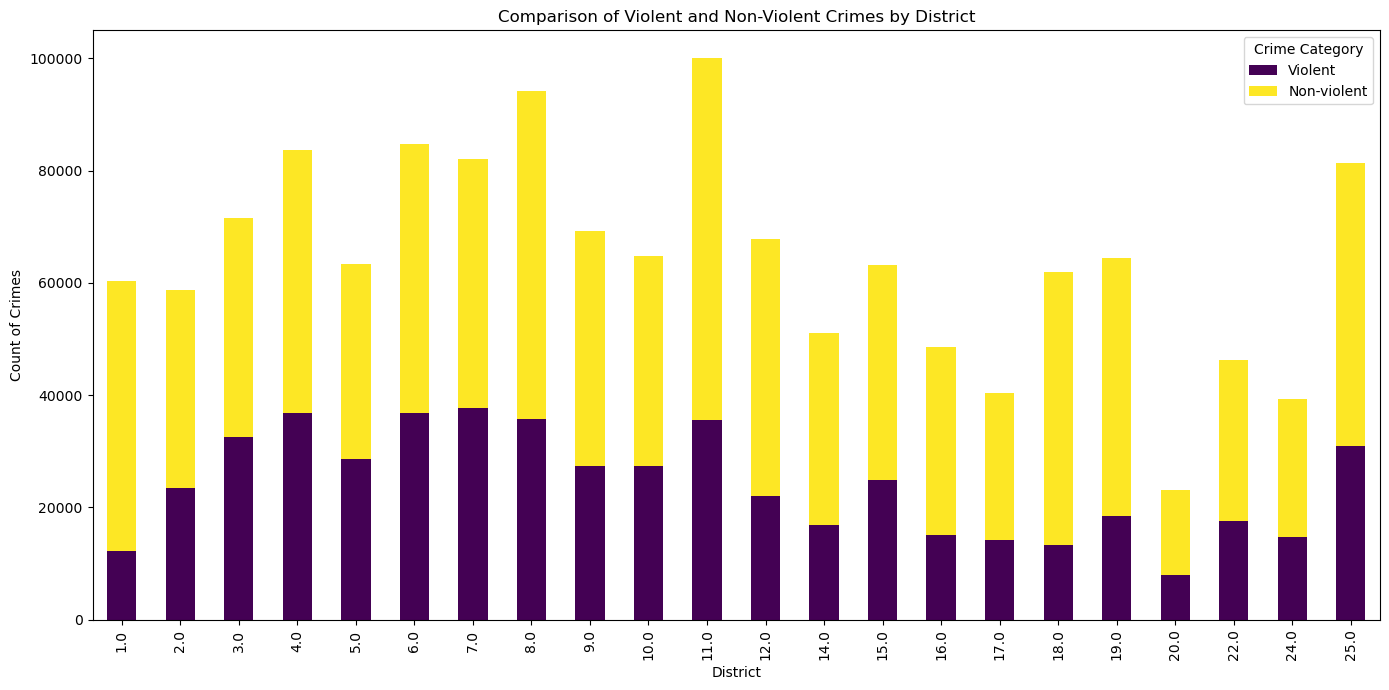

In [51]:
# Aggregate the counts for each crime category per district
crime_category_sums = chi_crime_data_visual.groupby('District')[[
    'Crime Category_violent', 'Crime Category_non-violent'
]].sum()


# Plotting Barplot
crime_category_sums.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Comparison of Violent and Non-Violent Crimes by District')
plt.xlabel('District')
plt.ylabel('Count of Crimes')
plt.legend(title='Crime Category', labels=['Violent', 'Non-violent'])
plt.tight_layout()
plt.show()

## *Insight:*
### Districts dominated by Crime: Districts 11, 8, 6 seem to have the highest amount of crime within the city. 
### Prevalence of Crime Categories: Non-violent crimes seem to dominate in all districts, indicated by the largest portions of the bars being purple.
### Most Violent Districts: Districts 11, 8, and 4 look to have the most violent districts.

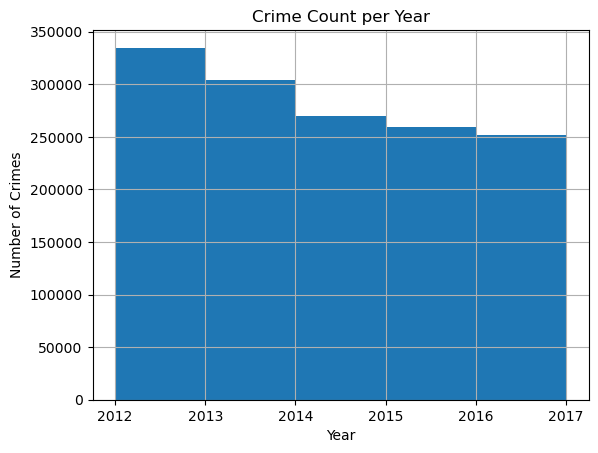

In [52]:
# Histogram of the 'Year' column to see the distribution of crimes over the years
chi_crime_data_visual['Year'].hist(bins=range(2012, 2017))
plt.title('Crime Count per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

## *Insight*:
###  Histogram shows a decrease in crime counts over the years. The drop from 2016 to 2017 is not proportional to previous years due to the lack of data in 2017.

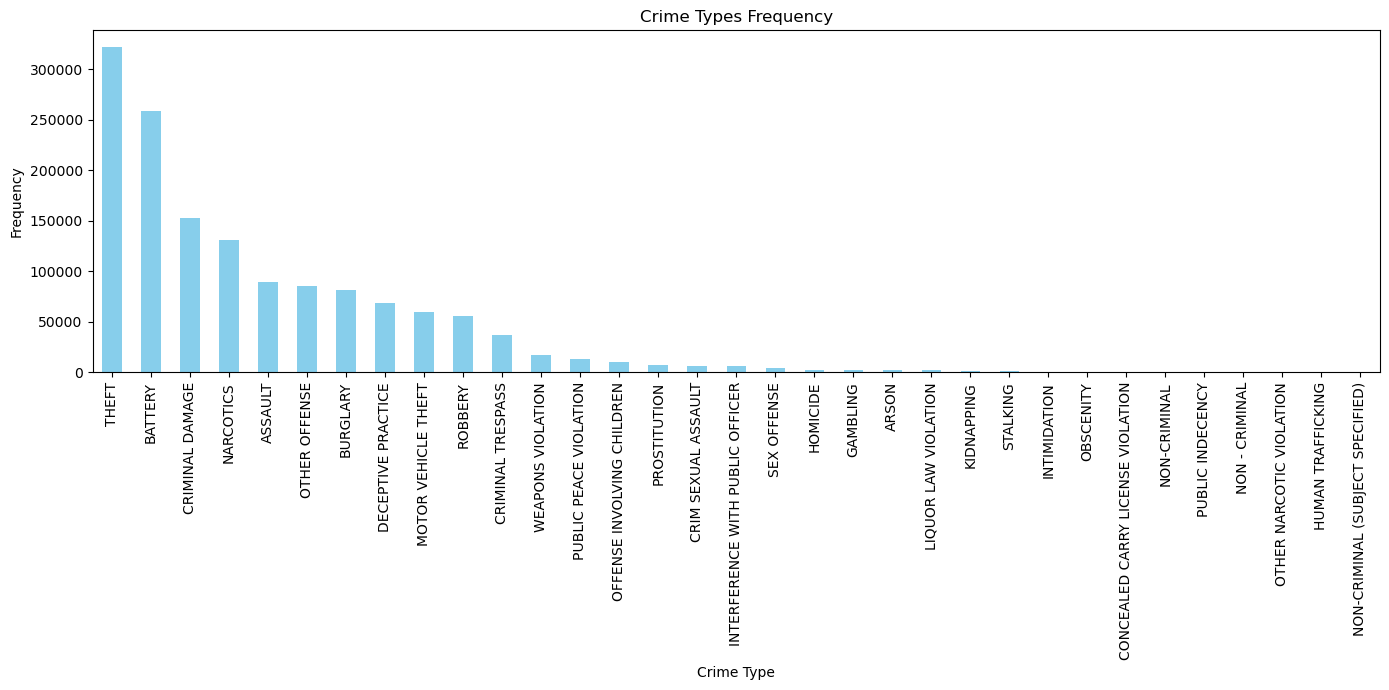

In [53]:
# Count the occurrences of each crime type
crime_type_counts = chi_crime_data_visual['Primary Type'].value_counts()

# Plot the frequency of each crime type
crime_type_counts.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Crime Types Frequency')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the labels vertically for better readability
plt.tight_layout()
plt.show()

## *Insight:*
### Theft tops the chart, followed by battery, criminal damage, and narcotics.

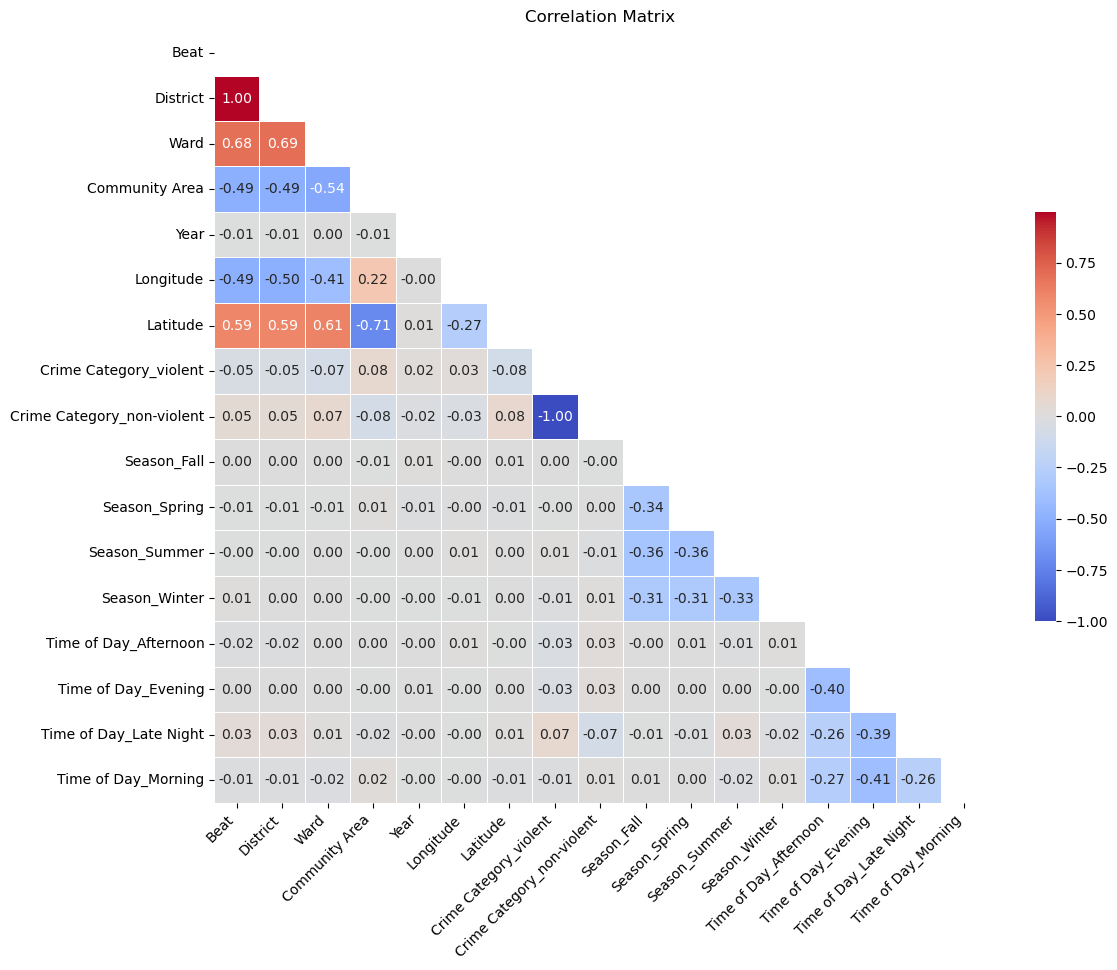

In [54]:
# Selecting the relevant columns for correlation - make sure these columns are properly encoded as numeric values
relevant_columns = ['Beat', 'District', 'Ward', 'Community Area', 'Year', 
                    'Longitude', 'Latitude', 'Crime Category_violent', 'Crime Category_non-violent', 'Season_Fall', 
                    'Season_Spring', 'Season_Summer', 'Season_Winter', 'Time of Day_Afternoon', 'Time of Day_Evening', 
                    'Time of Day_Late Night', 'Time of Day_Morning']


# Start Correlation Matrix
correlation_data = chi_crime_data_visual[relevant_columns].apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## *Insight:*
### Redundant Features: X Coordinate with Longitude and Y Coordinate with Latitude are essentially duplicates. Dropping X and Y coordinates to reduce redundancy.
### Community Area with Beat and District: There's a negative correlation between Community Area and both Beat and District.

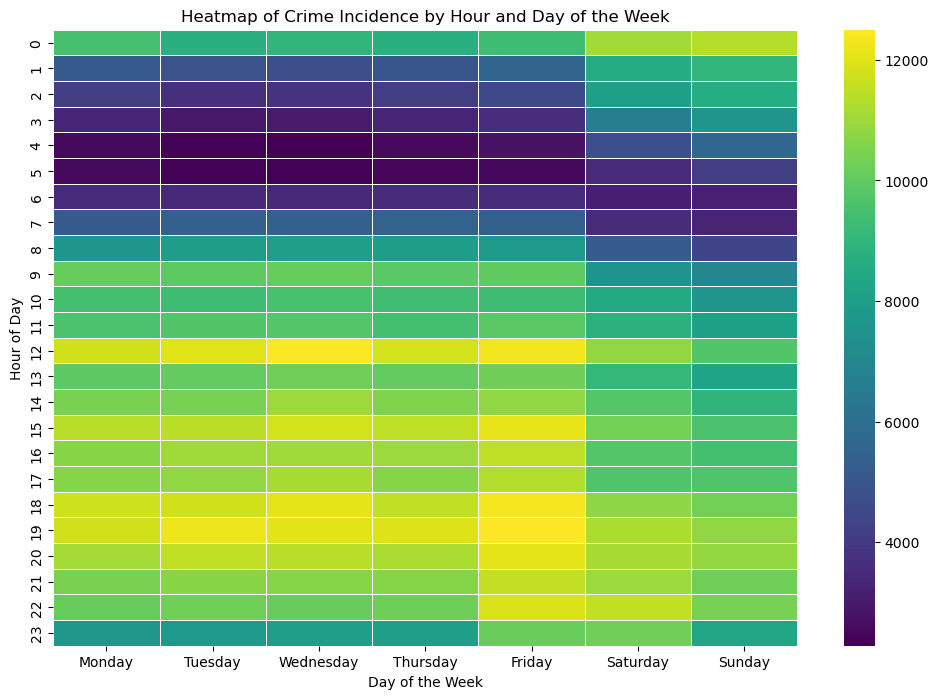

In [55]:
# Create a pivot table
heatmap_data = chi_crime_data.pivot_table(values='ID', index='Hour', columns='Day of Week', aggfunc='size')

# Reorder the days of the week starting from Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[days_order]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Crime Incidence by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()

## *Insight:*
### The heatmap suggests that certain days and times have higher crime incidents. Weekends and later hours (Friday 1800-2200 worst time) have more crimes, which can be critical information for law enforcement resource allocation.

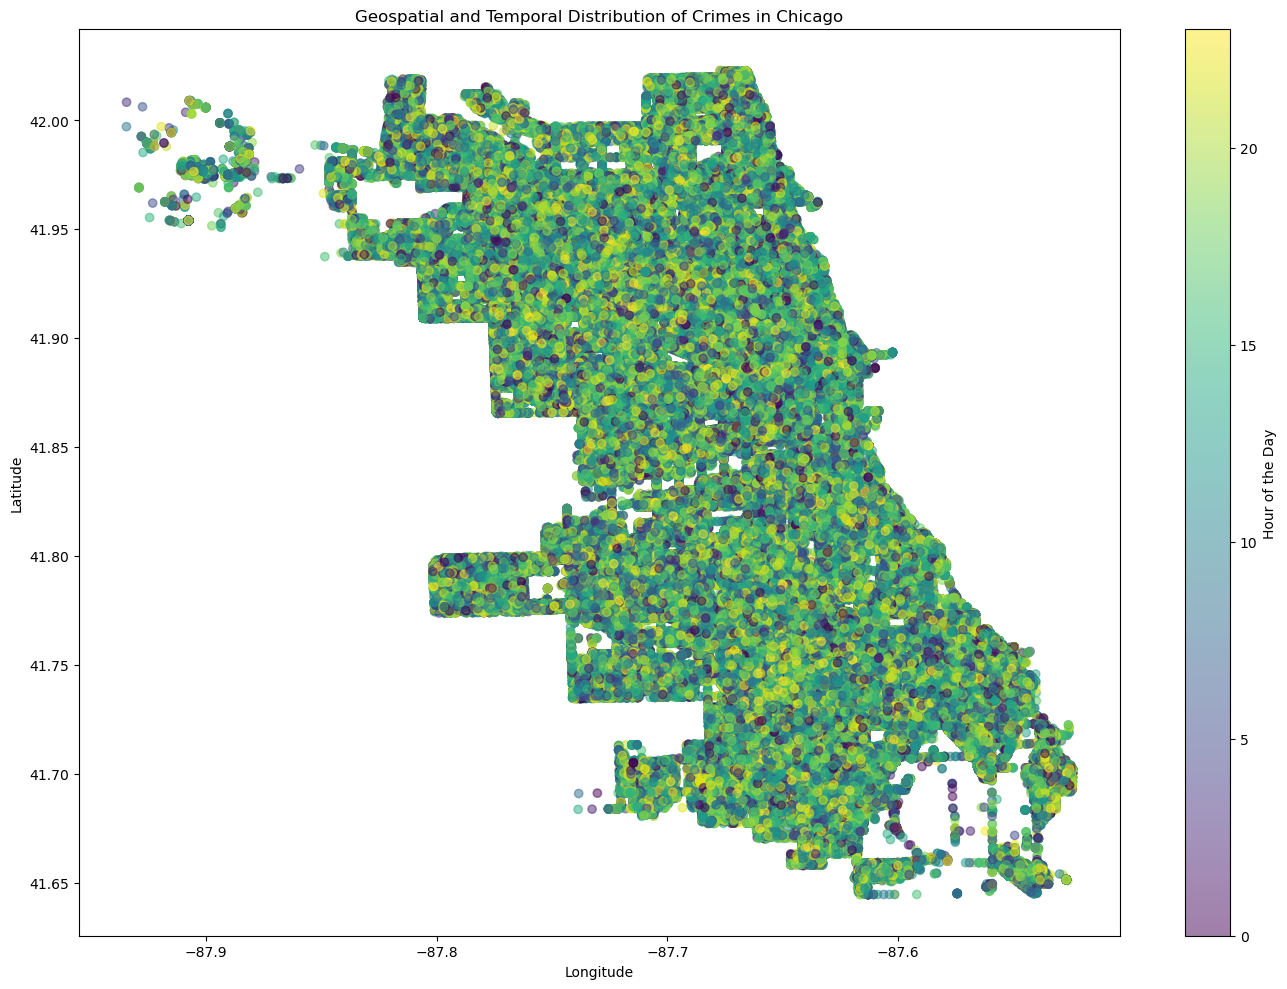

In [56]:
# Use 'Crime Category' as color coding: violet for violent, yellow for non-violent

# Latitude range that focuses on Chicago
chi_crime_data_filtered = chi_crime_data_visual[
    (chi_crime_data_visual['Latitude'] > 41.60) & 
    (chi_crime_data_visual['Latitude'] < 42.05) &
    (chi_crime_data_visual['Longitude'] > -88) & 
    (chi_crime_data_visual['Longitude'] < -87.50)
]

plt.figure(figsize=(14, 10))

# Create a scatter plot using the 'Hour' column to color-code the points
sc = plt.scatter(chi_crime_data_filtered['Longitude'], 
                 chi_crime_data_filtered['Latitude'], 
                 c=chi_crime_data_filtered['Hour'],  # Color by hour of the day
                 cmap='viridis',  # Use a colormap that transitions from light to dark
                 alpha=0.5)

# Add a colorbar with a label
cb = plt.colorbar(sc)
cb.set_label('Hour of the Day')

plt.title('Geospatial and Temporal Distribution of Crimes in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

## Investigate:
### The crimes are spread across the city, with varying densities. The darkest areas may indicate higher concentrations of crime incidents. 


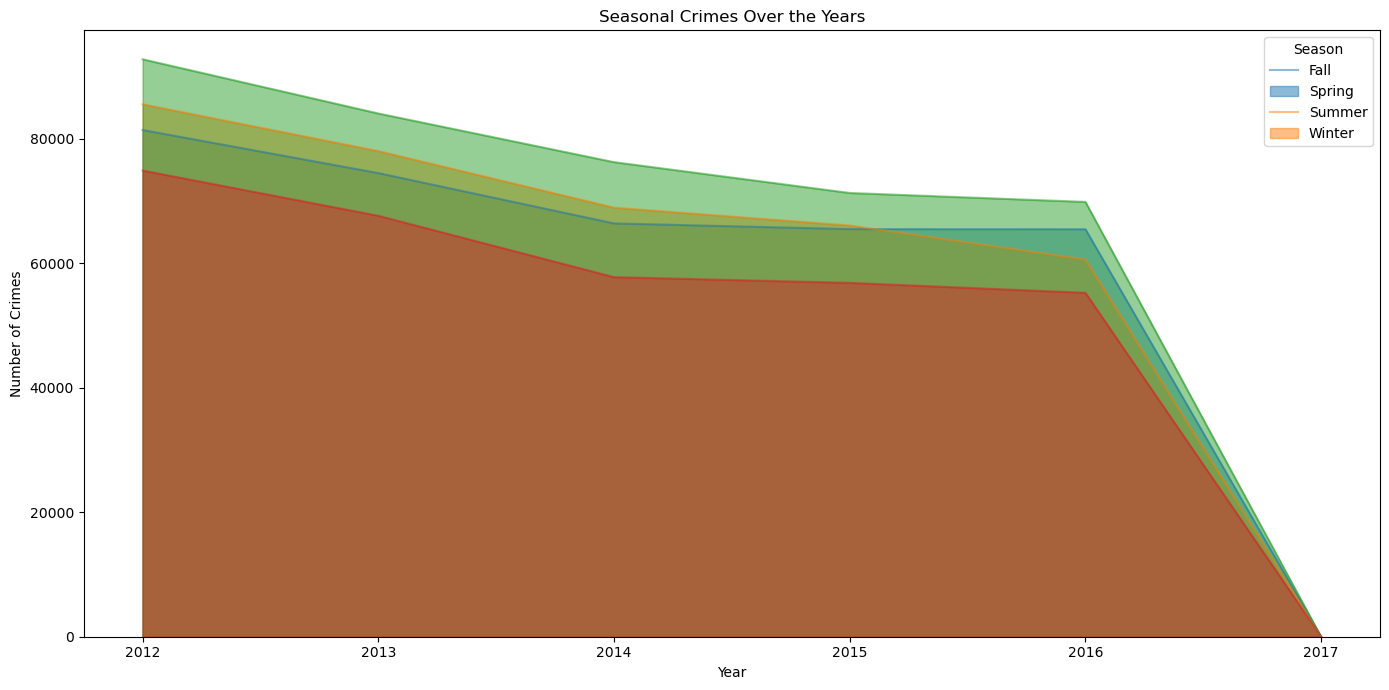

In [57]:
# Create a new DataFrame to store seasonal crime counts
seasonal_crimes = chi_crime_data_visual.groupby('Year')[[
    'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter'
]].sum()

# Columns are already in boolean format (1 for True, 0 for False), so summing them gives the count

# Plotting the data
seasonal_crimes.plot(kind='area', stacked=False, figsize=(14, 7))
plt.title('Seasonal Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(['Fall', 'Spring', 'Summer', 'Winter'], title='Season')
plt.tight_layout()
plt.show()

## *Insight:*
### This line area chart shows the crime counts for each month across different years. It looks like there's a seasonal pattern, with higher crime rates in mid-year months.

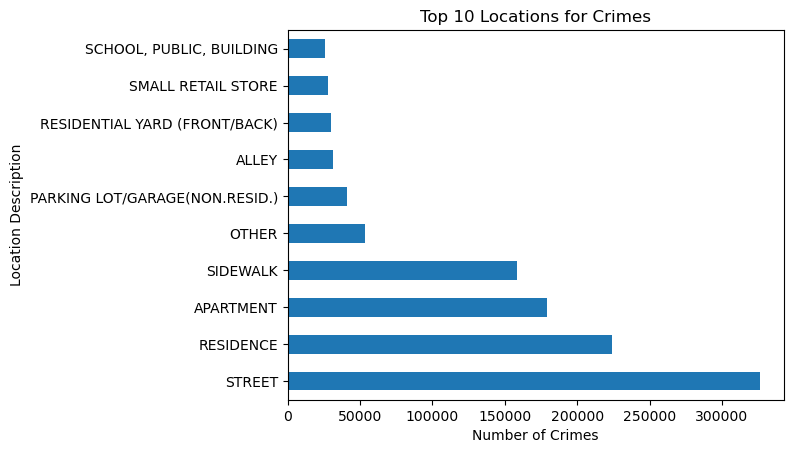

In [58]:
# Frequency of crimes by location description
location_crime_counts = chi_crime_data['Location Description'].value_counts().head(10)
location_crime_counts.plot(kind='barh')
plt.title('Top 10 Locations for Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.show()

## *Insight:*
### Streets, residences, and apartments are the most common places for crimes, which might be expected given their accessibility and population density.

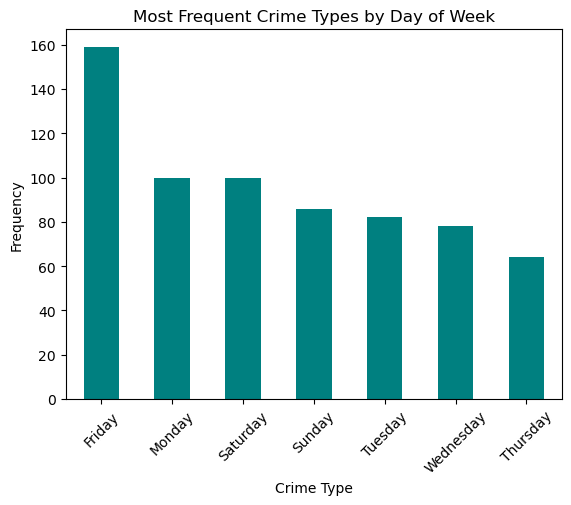

In [59]:
# Group data by 'District' and 'Primary Type', then count occurrences
district_crime = chi_crime_data.groupby(['District', 'Primary Type', 'Day of Week']).size().unstack().fillna(0)

# Find the top crime type in each district
top_crime_by_district = district_crime.idxmax(axis=1)

# Plot results
top_crime_by_district.value_counts().plot(kind='bar', color='teal')
plt.title('Most Frequent Crime Types by Day of Week')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## *Insight:*
### This chart shows the counts of the most frequent crime types by day of the week across all districts.

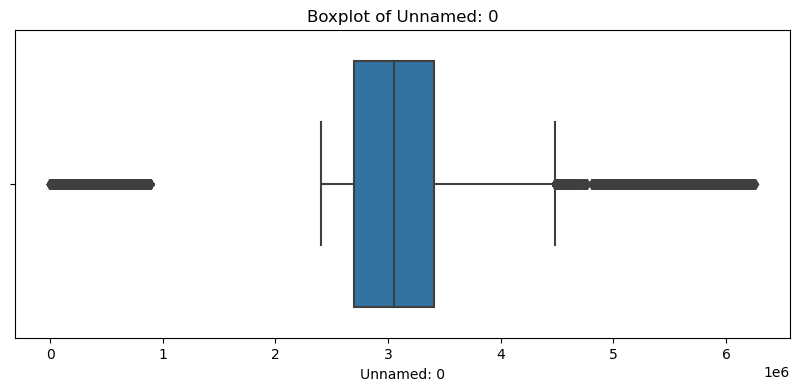

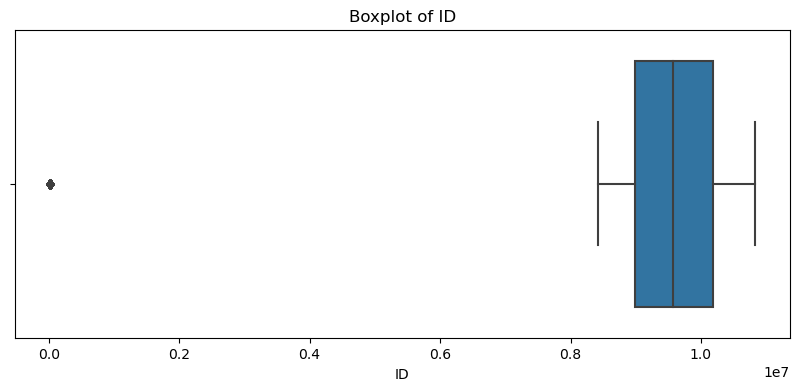

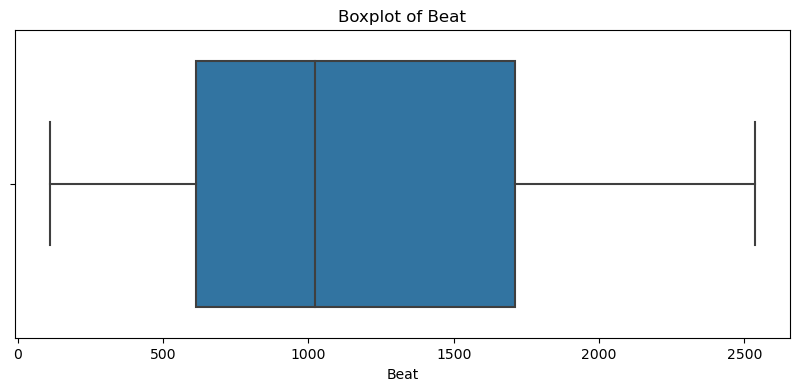

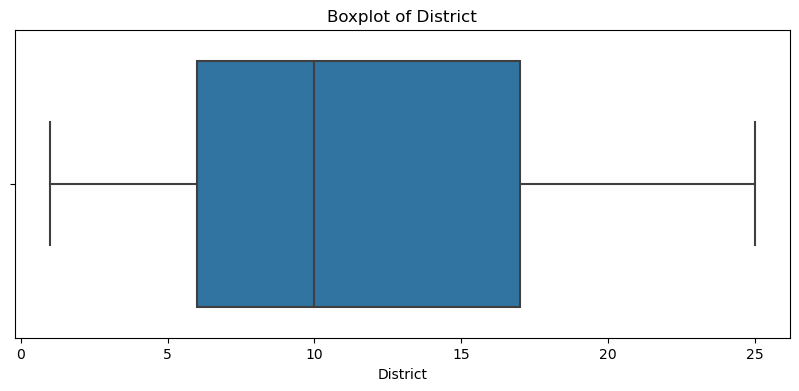

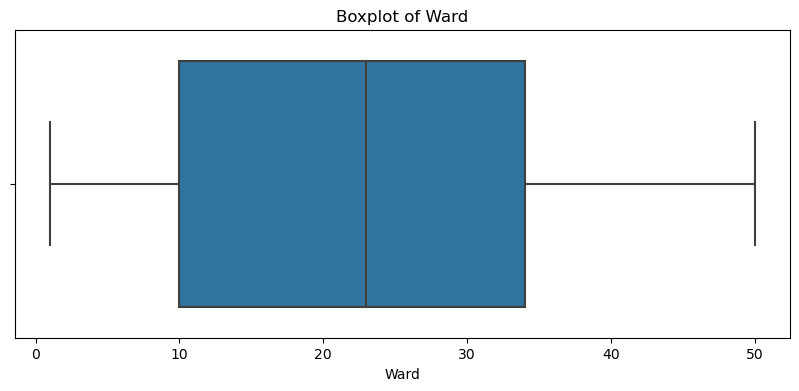

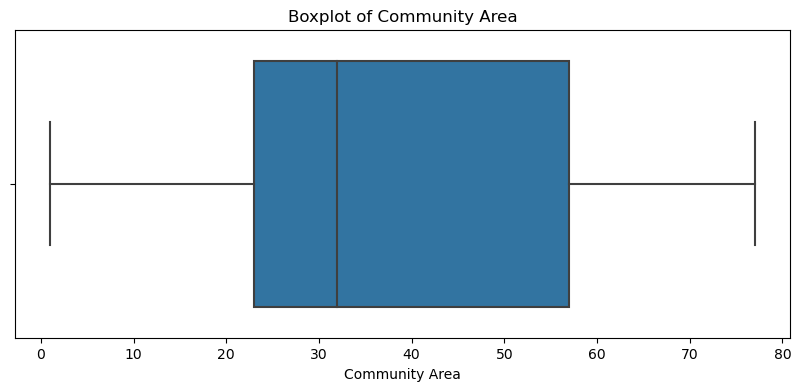

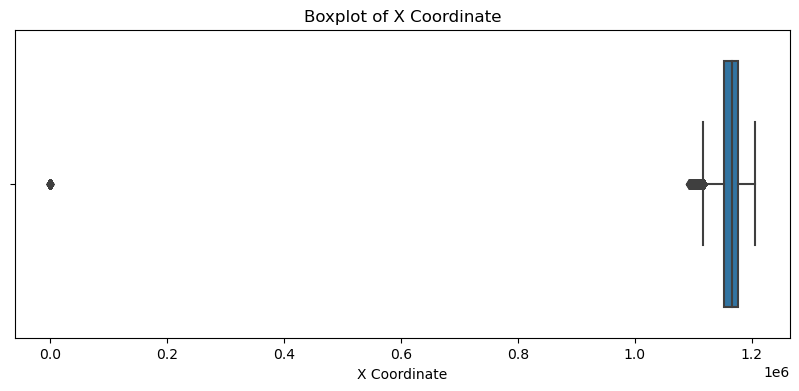

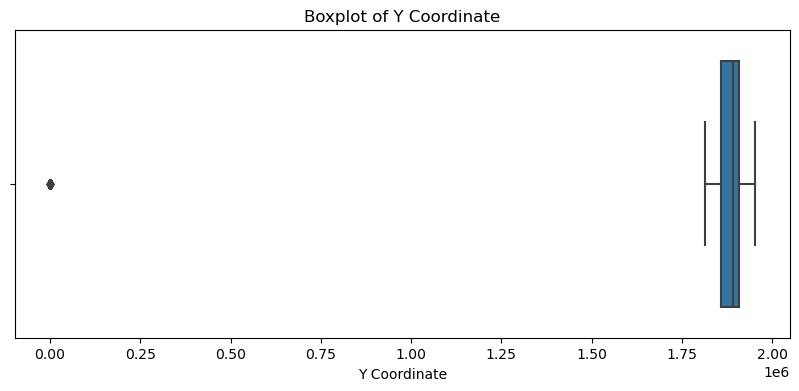

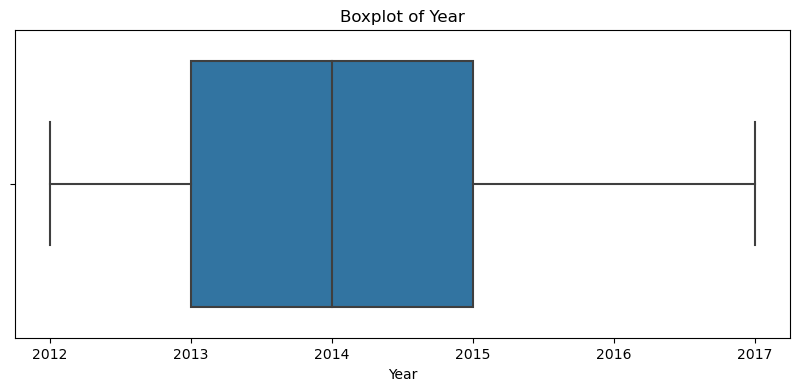

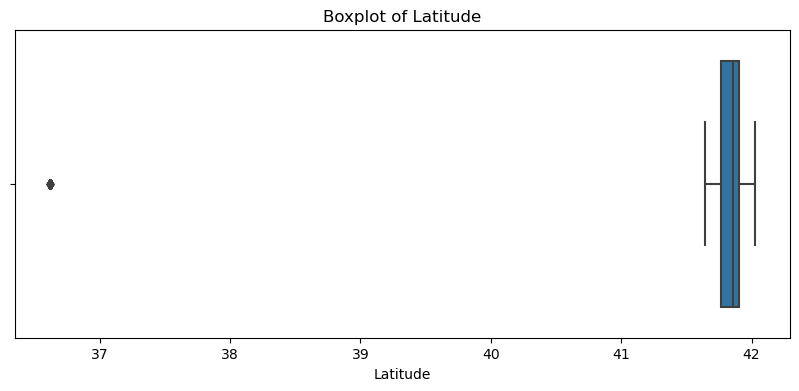

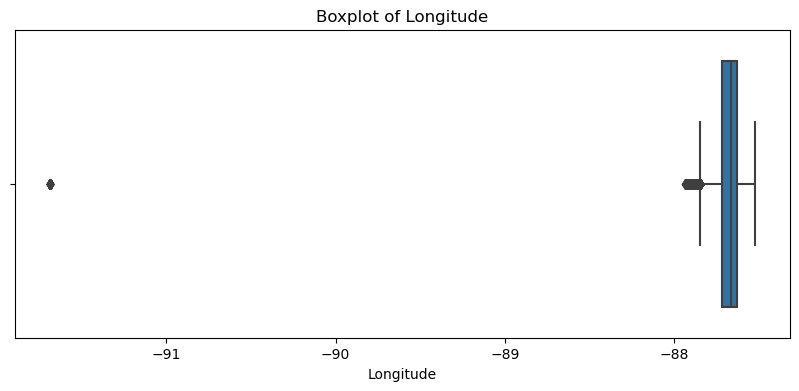

In [60]:
# Checking for outliers within the dataset
numeric_cols = chi_crime_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=chi_crime_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [61]:
chi_crime_data_visual.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 1419590 entries, 0 to 1456713
Data columns (total 36 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Unnamed: 0                  1419590 non-null  int64         
 1   ID                          1419590 non-null  int64         
 2   Case Number                 1419590 non-null  object        
 3   Date                        1419590 non-null  datetime64[ns]
 4   Block                       1419590 non-null  object        
 5   IUCR                        1419590 non-null  object        
 6   Primary Type                1419590 non-null  object        
 7   Description                 1419590 non-null  object        
 8   Location Description        1419590 non-null  object        
 9   Arrest                      1419590 non-null  int32         
 10  Domestic                    1419590 non-null  int32         
 11  Beat                        1

In [120]:
chi_crime_data_visual.isnull().sum()

Unnamed: 0                    0
ID                            0
Case Number                   0
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description          0
Arrest                        0
Domestic                      0
Beat                          0
District                      0
Ward                          0
Community Area                0
FBI Code                      0
X Coordinate                  0
Y Coordinate                  0
Year                          0
Updated On                    0
Latitude                      0
Longitude                     0
Location                      0
Hour                          0
Day of Week                   0
Month                         0
Crime Category_non-violent    0
Crime Category_violent        0
Season_Fall                   0
Season_Spring                 0
Season_Summer                 0
Season_W

## Model Preparation

In [96]:
# Creating a new dataframe
chi_crime_data_machine = chi_crime_data.copy()

In [97]:
chi_crime_data_machine.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour                    0
Day of Week             0
Month                   0
dtype: int64

In [98]:
chi_crime_data_machine.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 1419590 entries, 0 to 1456713
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Unnamed: 0            1419590 non-null  int64         
 1   ID                    1419590 non-null  int64         
 2   Case Number           1419590 non-null  object        
 3   Date                  1419590 non-null  datetime64[ns]
 4   Block                 1419590 non-null  object        
 5   IUCR                  1419590 non-null  object        
 6   Primary Type          1419590 non-null  object        
 7   Description           1419590 non-null  object        
 8   Location Description  1419590 non-null  object        
 9   Arrest                1419590 non-null  int32         
 10  Domestic              1419590 non-null  int32         
 11  Beat                  1419590 non-null  int64         
 12  District              1419590 non-null  float64

In [100]:
chi_crime_data_machine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419590 entries, 0 to 1456713
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Unnamed: 0            1419590 non-null  int64         
 1   ID                    1419590 non-null  int64         
 2   Case Number           1419590 non-null  object        
 3   Date                  1419590 non-null  datetime64[ns]
 4   Block                 1419590 non-null  object        
 5   IUCR                  1419590 non-null  object        
 6   Primary Type          1419590 non-null  object        
 7   Description           1419590 non-null  object        
 8   Location Description  1419590 non-null  object        
 9   Arrest                1419590 non-null  int32         
 10  Domestic              1419590 non-null  int32         
 11  Beat                  1419590 non-null  int64         
 12  District              1419590 non-null  float64

In [101]:
chi_crime_data_machine.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour                    0
Day of Week             0
Month                   0
dtype: int64

In [103]:
chi_crime_data_machine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419590 entries, 0 to 1456713
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Unnamed: 0            1419590 non-null  int64         
 1   ID                    1419590 non-null  int64         
 2   Case Number           1419590 non-null  object        
 3   Date                  1419590 non-null  datetime64[ns]
 4   Block                 1419590 non-null  object        
 5   IUCR                  1419590 non-null  object        
 6   Primary Type          1419590 non-null  object        
 7   Description           1419590 non-null  object        
 8   Location Description  1419590 non-null  object        
 9   Arrest                1419590 non-null  int32         
 10  Domestic              1419590 non-null  int32         
 11  Beat                  1419590 non-null  int64         
 12  District              1419590 non-null  float64

In [104]:
chi_crime_data_machine.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour                    0
Day of Week             0
Month                   0
dtype: int64

In [107]:
chi_crime_data_machine.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour                    0
Day of Week             0
Month                   0
dtype: int64

In [112]:
# Define the columns to keep
columns_to_keep = ['District', 'Beat', 'Hour', 'Month', 'Year']

# Create a list of columns to drop (all columns not in columns_to_keep)
columns_to_drop = [col for col in chi_crime_data_machine.columns if col not in columns_to_keep]

# Drop the unwanted columns directly in the original DataFrame
chi_crime_data_machine.drop(columns=columns_to_drop, inplace=True)

# Verify the changes by checking the structure of the DataFrame
chi_crime_data_machine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419590 entries, 0 to 1456713
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Beat      1419590 non-null  int64  
 1   District  1419590 non-null  float64
 2   Year      1419590 non-null  int64  
 3   Hour      1419590 non-null  int32  
 4   Month     1419590 non-null  int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 54.2 MB


In [115]:
# Check the results to ensure the mapping worked as expected
print(chi_crime_data_machine['District'].value_counts())

District
11.0    99977
8.0     94243
6.0     84718
4.0     83590
7.0     82129
25.0    81310
3.0     71575
9.0     69173
12.0    67733
10.0    64744
19.0    64345
5.0     63417
15.0    63155
18.0    61892
1.0     60288
2.0     58717
14.0    51030
16.0    48522
22.0    46248
17.0    40359
24.0    39295
20.0    23130
Name: count, dtype: int64


In [116]:
# Check the results to ensure the mapping worked as expected
print(chi_crime_data_machine['Hour'].value_counts())

Hour
19    82509
12    80791
18    80523
20    79305
15    78102
21    75201
22    74620
16    74400
17    73900
14    71888
13    67877
0     67688
11    65356
9     64638
10    63068
23    60251
8     48910
1     42983
2     36961
7     33693
3     30460
6     23848
4     22851
5     19767
Name: count, dtype: int64


In [117]:
# Check the results to ensure the mapping worked as expected
day_of_week_counts = chi_crime_data_machine.filter(like='Day of Week').sum()
day_of_week_counts

Series([], dtype: float64)

In [118]:
# Check the results to ensure the mapping worked as expected
print(chi_crime_data_machine['Month'].value_counts())

Month
7     133789
8     131757
6     128820
5     128057
9     122163
10    121446
3     115773
4     115482
1     110290
11    109765
12    106141
2      96107
Name: count, dtype: int64


In [121]:
# Rechecking data after updates
chi_crime_data_machine.isnull().sum()

Beat        0
District    0
Year        0
Hour        0
Month       0
dtype: int64

## Random Forest Model

### Using Features Beat, Year, Hour, Month

In [122]:
# Define your features and target variable
X = chi_crime_data_machine.drop('District', axis=1)
y = chi_crime_data_machine['District']

In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [126]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.999764016370924

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12109
         2.0       1.00      1.00      1.00     11886
         3.0       1.00      1.00      1.00     14475
         4.0       1.00      1.00      1.00     16664
         5.0       1.00      1.00      1.00     12626
         6.0       1.00      1.00      1.00     16920
         7.0       1.00      1.00      1.00     16306
         8.0       1.00      1.00      1.00     18747
         9.0       1.00      1.00      1.00     13828
        10.0       1.00      1.00      1.00     12775
        11.0       1.00      1.00      1.00     19867
        12.0       1.00      1.00      1.00     13546
        14.0       1.00      1.00      1.00     10173
        15.0       1.00      1.00      1.00     12667
        16.0       1.00      1.00      1.00      9847
        17.0       1.00      1.00      1.00      8047
        18.0       1.00     

In [127]:
# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_dict = {name: score for name, score in zip(feature_names, importances)}
print("Feature importances:", feature_importance_dict)

Feature importances: {'Beat': 0.9968158489108689, 'Year': 0.000569049058840238, 'Hour': 0.0014030315515691674, 'Month': 0.0012120704787215578}


In [128]:
# Cross validation Scores
scores = cross_val_score(rf, X, y, cv=4)  # 4-fold cross-validation
print("Accuracy per fold: ", scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold:  [0.99197234 0.99646941 0.99608901 0.96899664]
Average accuracy:  0.9883818485069263


## Linear Regression Model

In [129]:
# Features and target variable
X = chi_crime_data_machine[['Beat', 'Year', 'Hour', 'Month']]
y = chi_crime_data_machine['District']

In [130]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [132]:
# Making predictions
y_pred = model.predict(X_test)

In [133]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.2280735041165471
R^2 Score: 0.9952247573089597


In [134]:
# R² score for evaluation with 4 folds
cv_scores = cross_val_score(model, X, y, cv=4, scoring='r2')

print("CV R² scores:", cv_scores)
print("Average CV R² score:", np.mean(cv_scores))

CV R² scores: [0.98038584 0.9993113  0.9996669  0.99958644]
Average CV R² score: 0.9947376178491749


## Logistic Regression Model

In [136]:
# Select features and target
X = chi_crime_data_machine[['Beat', 'Year', 'Hour', 'Month']]
y = chi_crime_data_machine['District']

In [137]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\kamar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [139]:
# Predictions
y_pred = model.predict(X_test)

In [140]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9986968068245057
Confusion Matrix:
[[12090     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0    19     0     0     0]
 [    0 11761     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0    70    55     0     0]
 [    0     0 14474     0     0     0     1     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0 16664     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0 12626     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 16920     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     1     0     0     0 16304     0     0     0     0     0
      0     0     0     0     0     0     0     0     1  

In [141]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=4)  # 4-fold cross-validation

C:\Users\kamar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kamar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [142]:
# Print the average of the cross-validation scores
print(f"Average CV Score: {cv_scores.mean()}")

Average CV Score: 0.997690181295066
